<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="800" style="background:none; border:none; box-shadow:none;" /></a> </center>
<hr />

# <h1 align="center"> Day-4- Regression Analysis Part 2 </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>

## In-class Tutorial + Exercise

## Part 2.  Generalized Linear Models

##  Generalized linear regression. Leukemia Remission

Consider data published on n = 27 leukemia patients. The data (leukemiaremission.txt) has a response
variable of whether leukemia remission occurred (REMISS), which is given by a 1.
The predictor variables are cellularity of the marrow clot section (CELL), smear differential percentage
of blasts (SMEAR), percentage of absolute marrow leukemia cell infiltrate (INFIL), percentage labeling
index of the bone marrow leukemia cells (LI), absolute number of blasts in the peripheral blood (BLAST),
and the highest temperature prior to start of treatment (TEMP).

In [7]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# leukemia = pd.read_csv("../data/leukemiaremission.txt", sep = "\t")
leukemia = pd.read_csv("leukemiaremission.txt", sep = "\t")
leukemia

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.80,0.83,0.66,1.9,1.10,1.00
1,1,0.90,0.36,0.32,1.4,0.74,0.99
2,0,0.80,0.88,0.70,0.8,0.18,0.98
3,0,1.00,0.87,0.87,0.7,1.05,0.99
4,1,0.90,0.75,0.68,1.3,0.52,0.98
5,0,1.00,0.65,0.65,0.6,0.52,0.98
6,1,0.95,0.97,0.92,1.0,1.23,0.99
7,0,0.95,0.87,0.83,1.9,1.35,1.02
8,0,1.00,0.45,0.45,0.8,0.32,1.00
9,0,0.95,0.36,0.34,0.5,0.00,1.04


In [6]:
leukemia['REMISS'] = leukemia.iloc[:, 0]
leukemia

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.80,0.83,0.66,1.9,1.10,1.00
1,1,0.90,0.36,0.32,1.4,0.74,0.99
2,0,0.80,0.88,0.70,0.8,0.18,0.98
3,0,1.00,0.87,0.87,0.7,1.05,0.99
4,1,0.90,0.75,0.68,1.3,0.52,0.98
5,0,1.00,0.65,0.65,0.6,0.52,0.98
6,1,0.95,0.97,0.92,1.0,1.23,0.99
7,0,0.95,0.87,0.83,1.9,1.35,1.02
8,0,1.00,0.45,0.45,0.8,0.32,1.00
9,0,0.95,0.36,0.34,0.5,0.00,1.04


### Exercise
(a) Consider the response and explanatory variables and give the appropriate random and systematic
component and the link function.

- REMISS: Binomial
- CELL: Poisson
- SMEAR(%): Normal
- INFIL(%): Normal
- LI(%): Normal
- BLAST: Poisson
- TEMP: Normal

b) Implement the model in Python and interpret the model output.



In [ ]:
# your code here


(c) Give the estimated odds of leukemia remission for LI=0.9.

In [ ]:
#your code here

(d) Compute the 95% Confidence intervals for the estimate for the predictor SMEAR

In [ ]:
#your code here

(e) Evaluate the model.

In [ ]:
#your code here

##  Generalized linear regression. YouTube Spam classification.

In [ ]:
# reading data from csv, specify the first column as an index column: index = 0
spam_data = pd.read_csv('../data/TubeSpam_vectorized.csv', index_col = 0)


# Feature Selection

Out of this words we need to find the most correlated for the feature selection purposes

In [ ]:
spam_data.columns

Index(['check', 'channel', 'hey', 'guys', 'new', 'leave', 'like', 'comment',
       'subscribe', 'just',
       ...
       'eminem', 'lost', 'musician', 'megan', 'fox', 'extraordinary',
       'moneygq', 'zonepa', 'waka', 'CLASS'],
      dtype='object', length=241)

In [ ]:
spam_data

,check,channel,hey,guys,new,leave,like,comment,subscribe,just,...,eminem,lost,musician,megan,fox,extraordinary,moneygq,zonepa,waka,CLASS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.374996,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.517648,0.0,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.491728,0.0,1
1950,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.491728,0.0,1
1951,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1
1952,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.491728,0.0,1


Remove CLASS as we need features (predictors) only

In [ ]:
features = spam_data.drop(columns = "CLASS")
features.shape

(1954, 240)

## Most Correlated

Find and plot most correlated features:

In [ ]:
n = 3
corr = features.corr()
corr = corr.mask(corr.apply(lambda x: x.name == x.index))

most_correlated = corr.abs(
    ).unstack(
        ).drop_duplicates(
            ).sort_values(ascending = False)[:3]

most_correlated

subscribe  need     0.937173
dont       wow      0.917538
time       sorry    0.899743
dtype: float64

Plot most_correlated

In [ ]:
columns_of_interest = np.unique(
    [i for j in most_correlated.index.to_list() for i in j]
    )

columns_of_interest

array(['dont', 'need', 'sorry', 'subscribe', 'time', 'wow'], dtype='<U9')

In [ ]:
# Helper function for adding the correlation coefficients
# to the top right plots.

def corr_annot(x, y, ax=None, **kws):
    """Annotate a plot w/ the correlation coefficient."""
    r, _ = st.pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

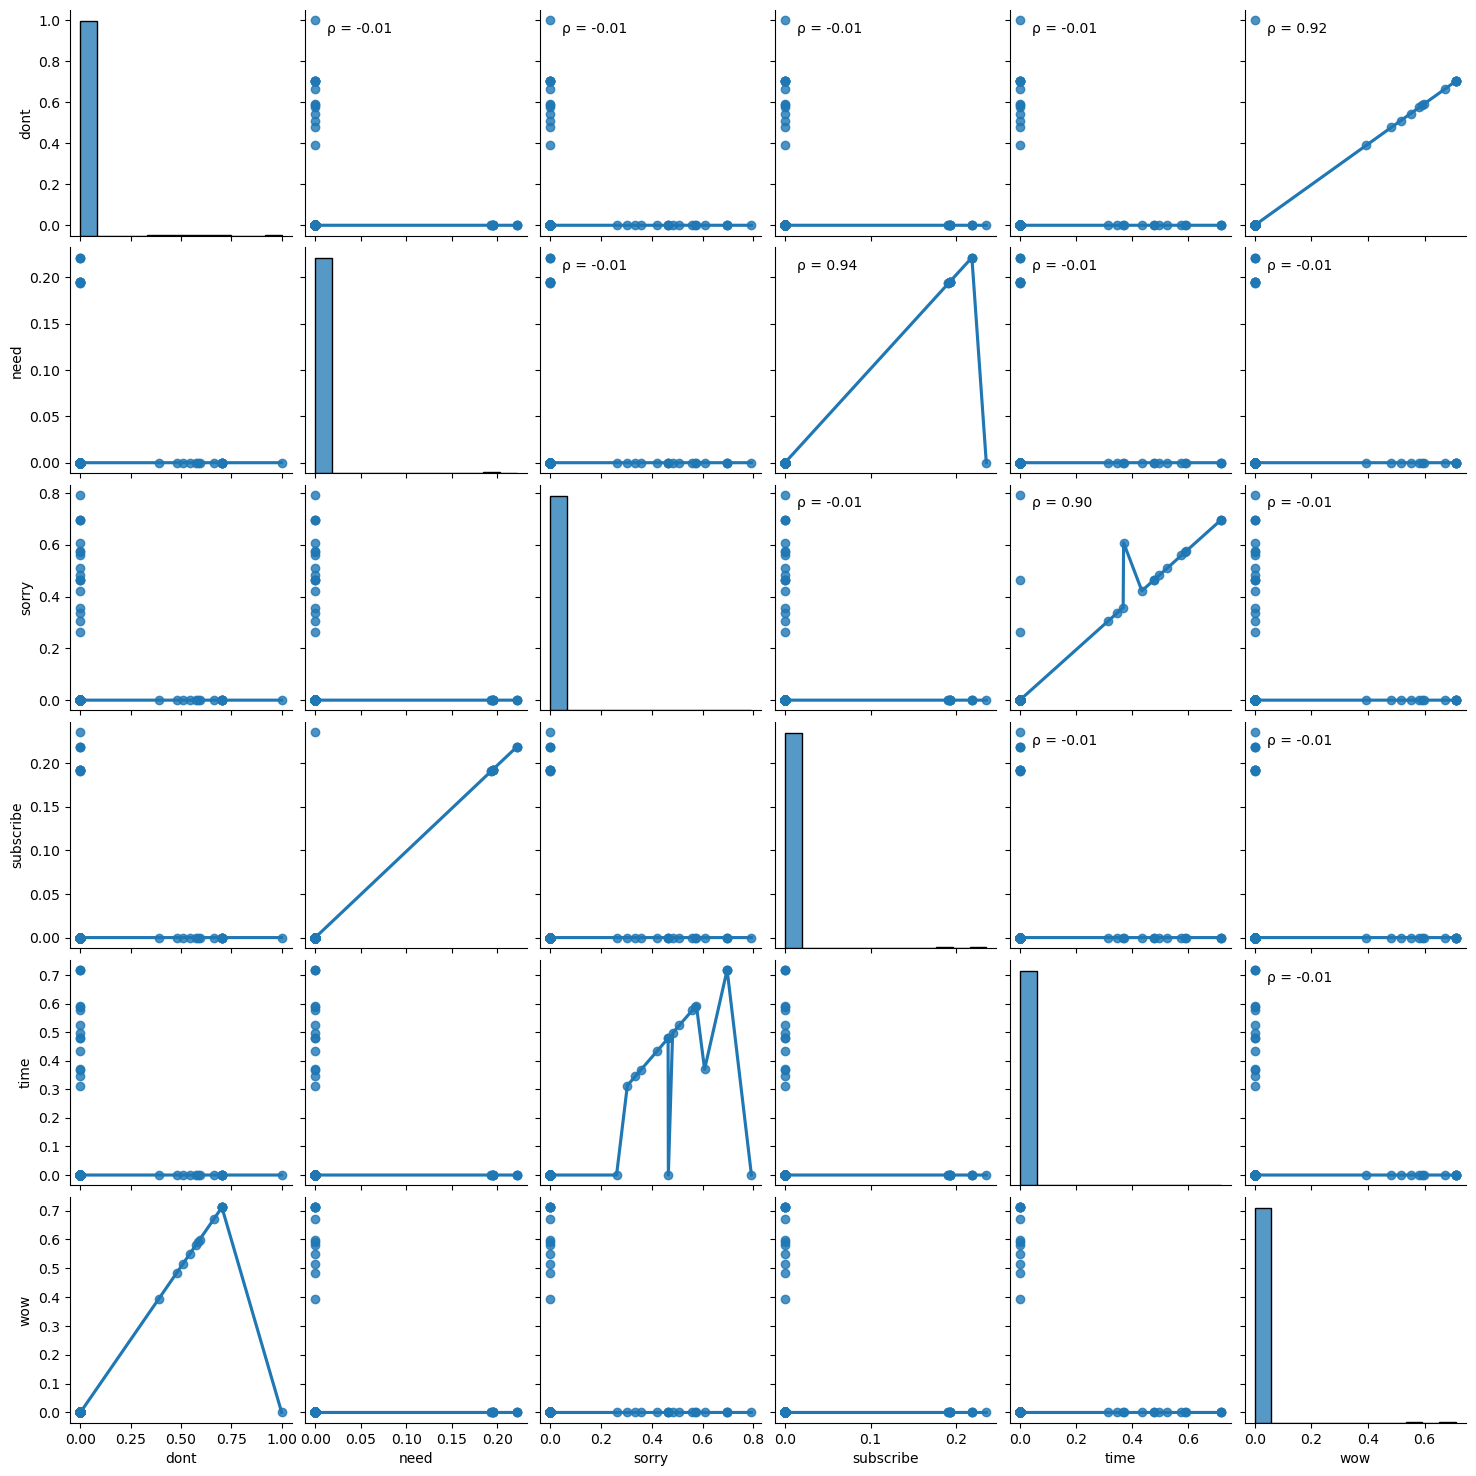

In [ ]:
%%capture --no-display
corr_example = features[columns_of_interest]

g = sns.pairplot(corr_example, kind = "reg", plot_kws = {"lowess":True});
g.map_upper(corr_annot);

## Least Correlated

In [ ]:
least_correlated = corr.abs(
  ).unstack(
    ).drop_duplicates(
      ).sort_values(ascending = True)[:3]

least_correlated

look  won      0.000002
com   earth    0.000004
post  ago      0.000005
dtype: float64

Plot least_correlated

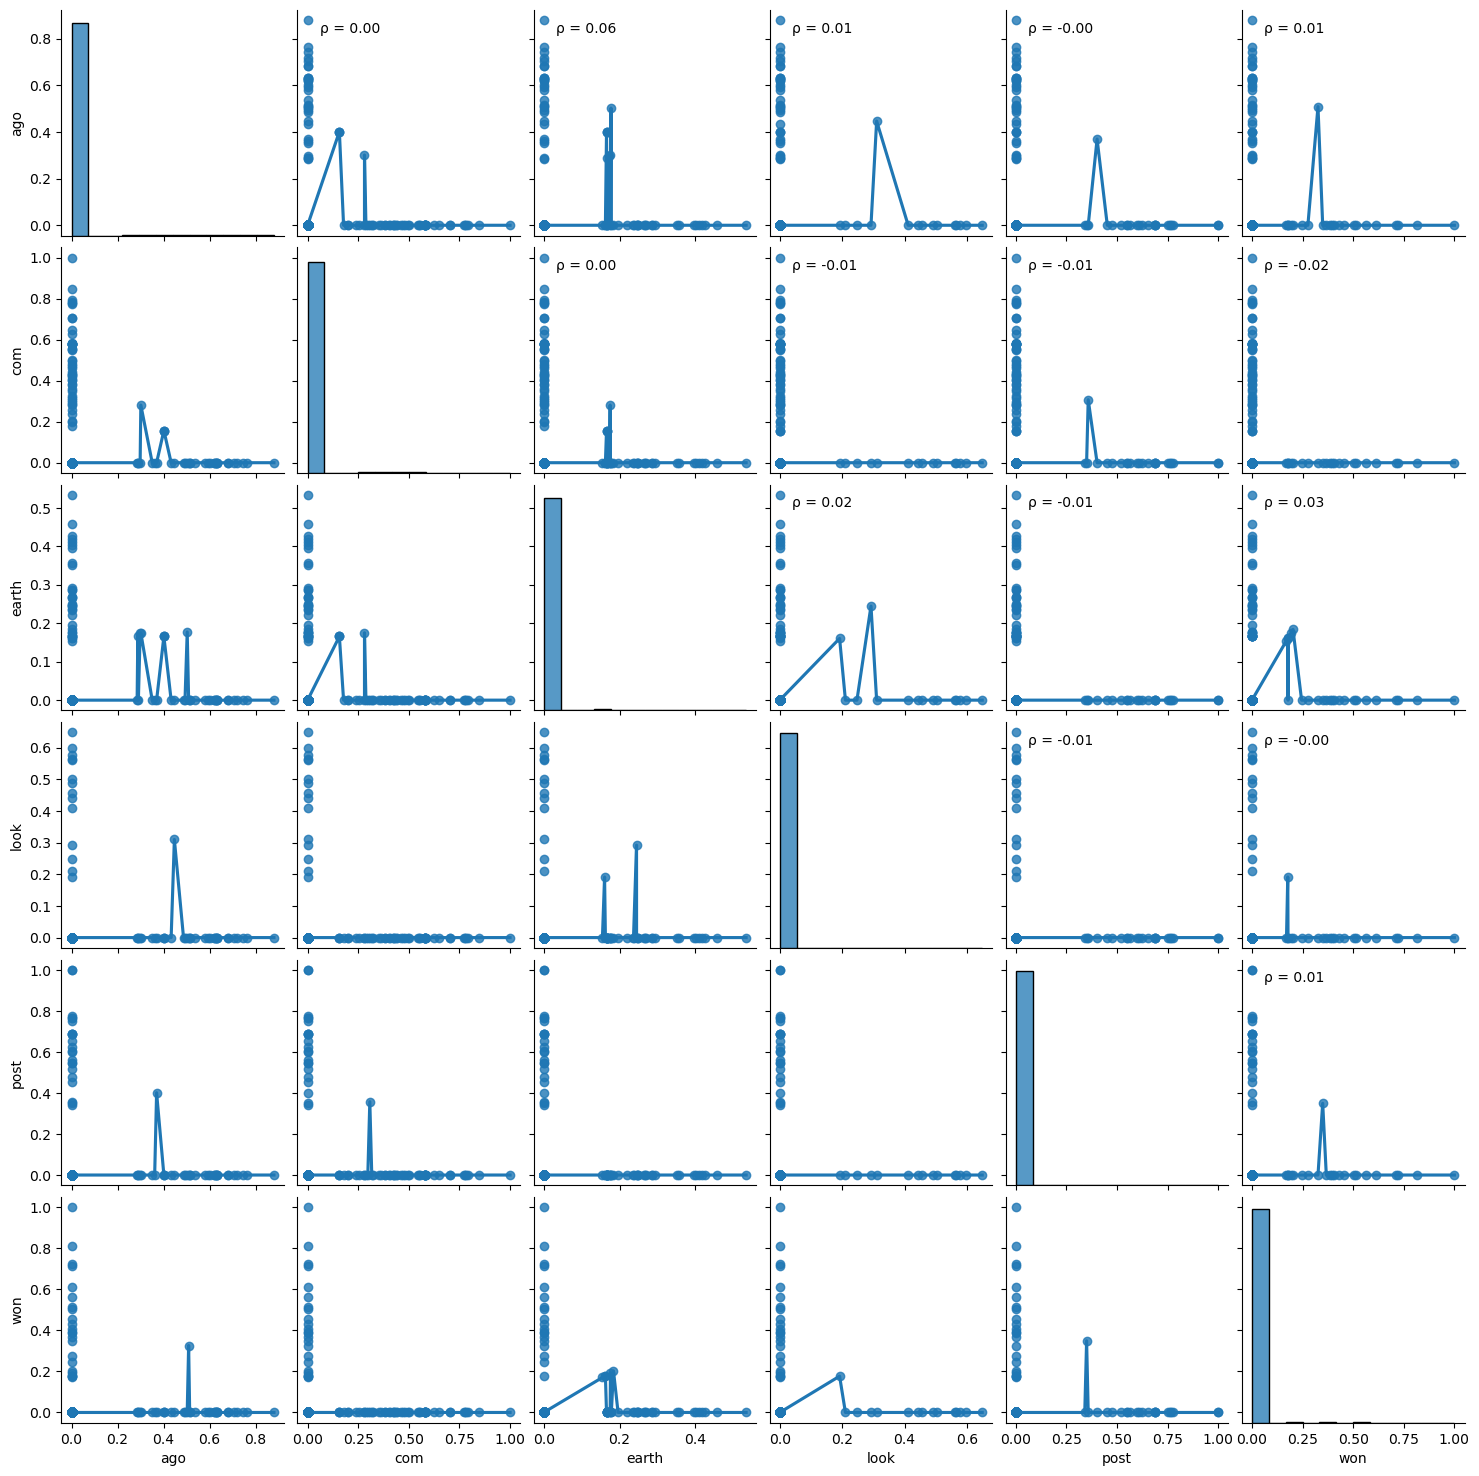

In [ ]:
%%capture --no-display
columns_of_interest = np.unique(
    [i for j in least_correlated.index.to_list() for i in j]
    )

print(columns_of_interest)

corr_example = features[columns_of_interest]

g = sns.pairplot(corr_example, kind = "reg", plot_kws = {"lowess":True});
g.map_upper(corr_annot);

## Random, slightly correlated (between 40 to 80%)

In [ ]:
randomly_correlated = corr.abs(
  ).unstack(
    ).drop_duplicates(
      ).where(
          lambda x:  (x >= 0.4) & (x <= 0.8)
      ).dropna(
        ).sample(
            n)

randomly_correlated

reading  need        0.468901
hit      gofundme    0.455560
https    rihanna     0.514681
dtype: float64

Plot randomly_correlated

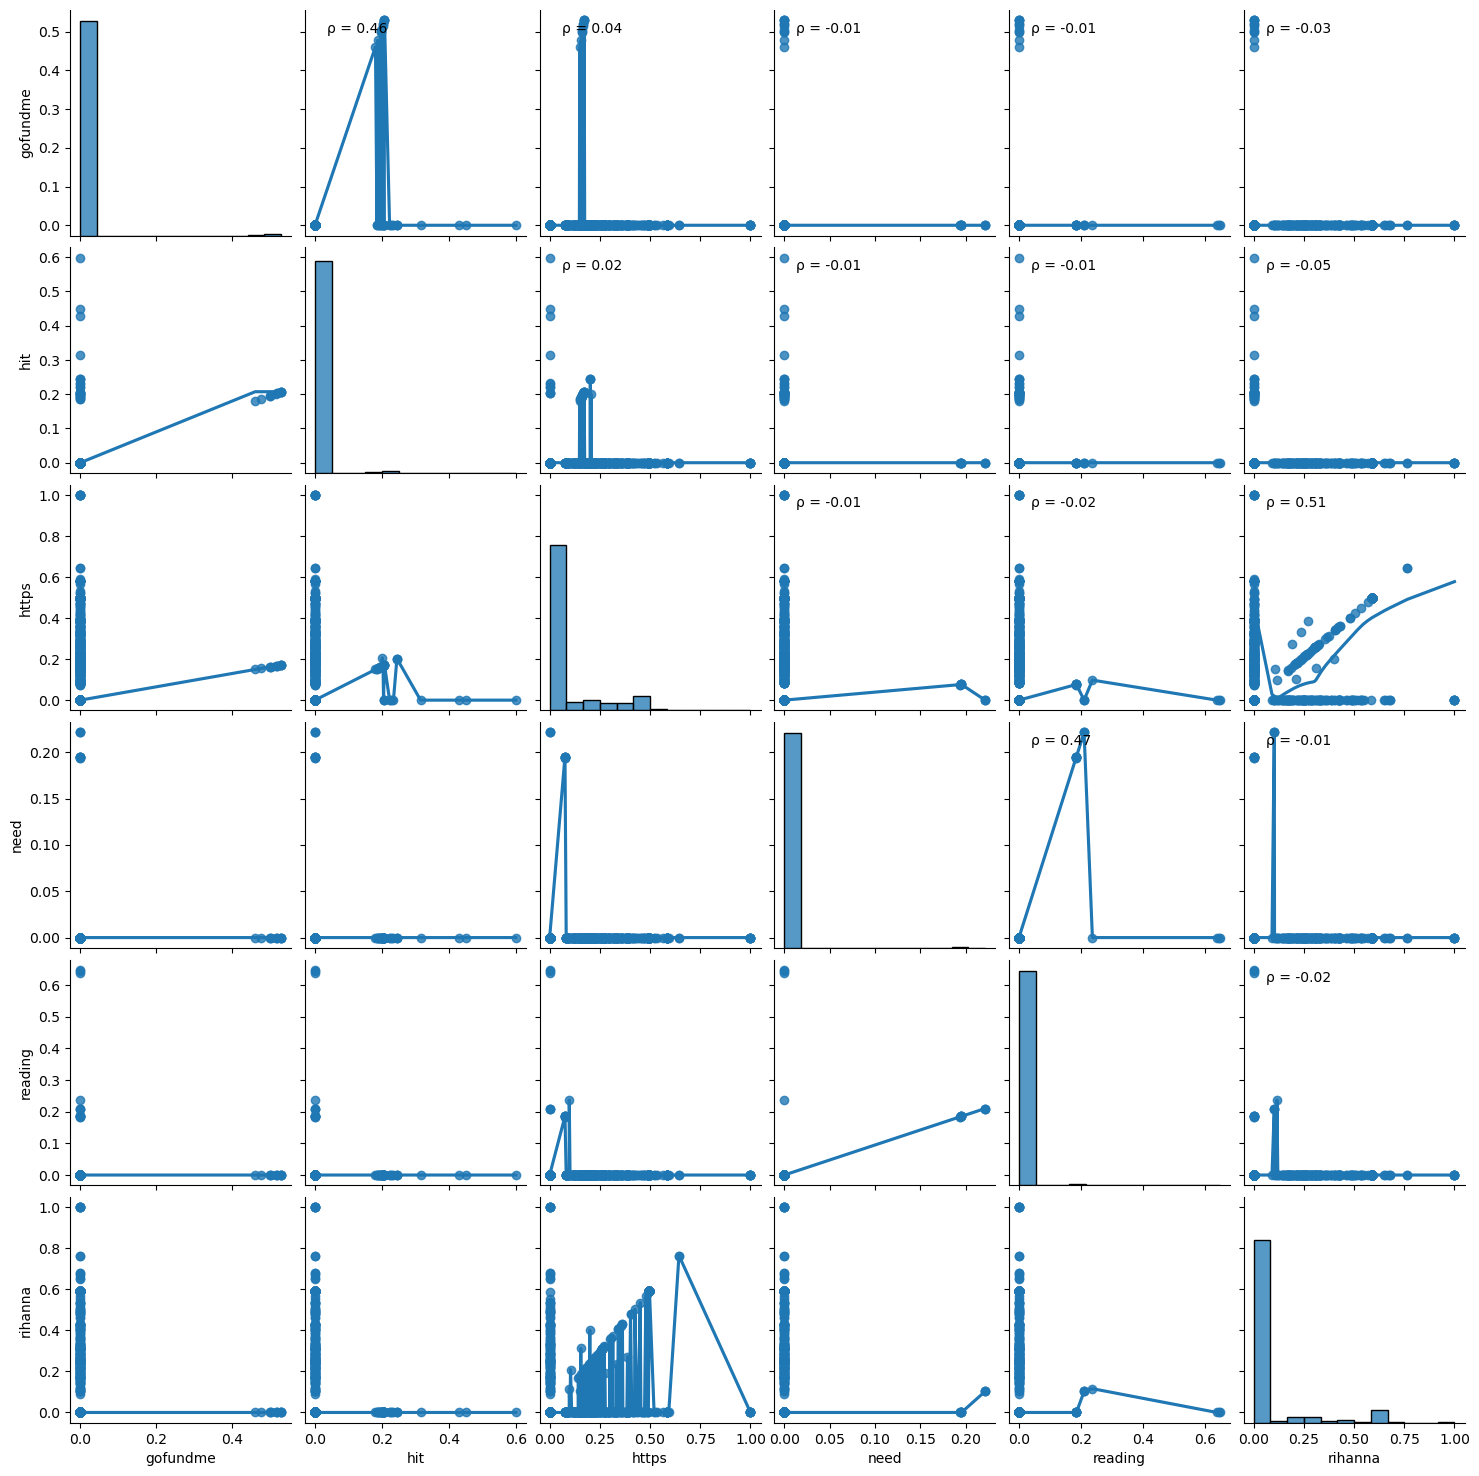

In [ ]:
%%capture --no-display
columns_of_interest = np.unique(
    [i for j in randomly_correlated.index.to_list() for i in j]
    )

print(columns_of_interest)

corr_example = features[columns_of_interest]

g = sns.pairplot(corr_example, kind = "reg", plot_kws = {"lowess":True});
g.map_upper(corr_annot);

## Combine all

Collect all the columns of interest that we just calculated:

Most representative columns are:  ago, com, dont, earth, gofundme, hit, https, look, need, post, reading, rihanna, sorry, subscribe, time, won, wow


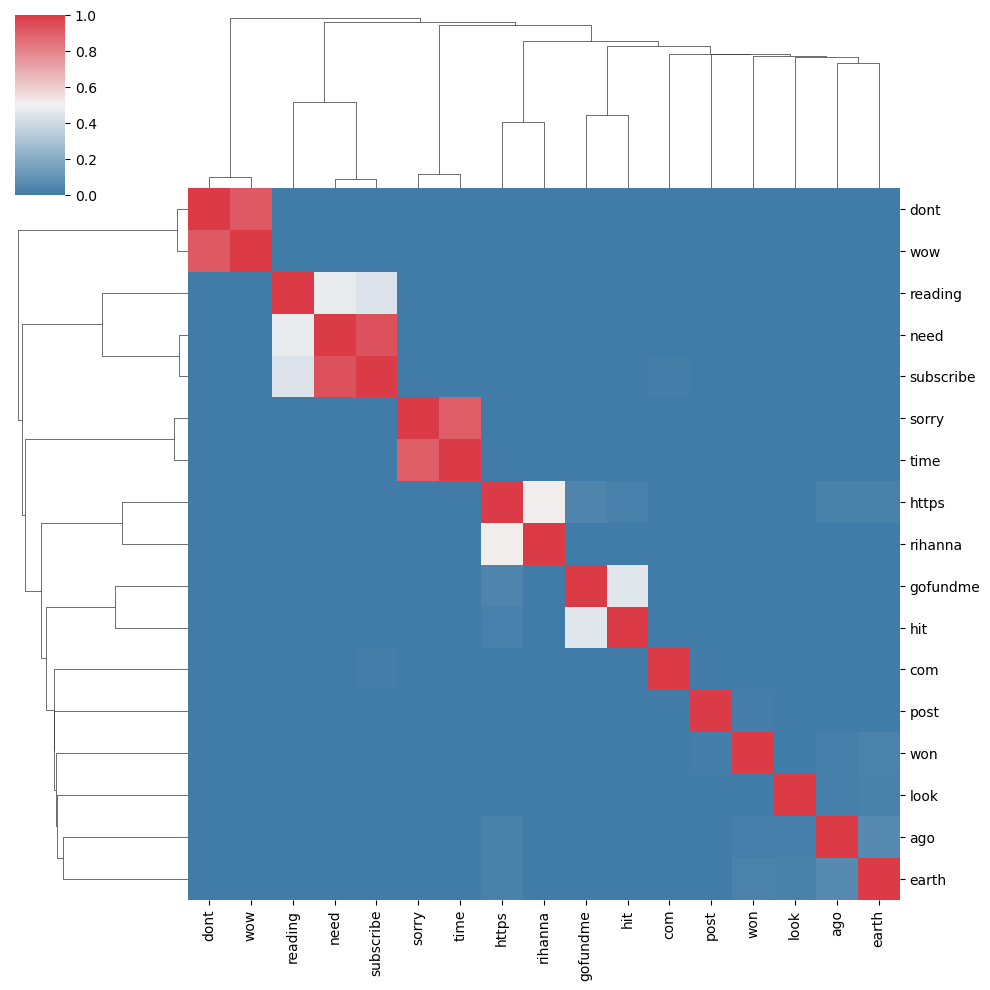

In [ ]:
columns_of_interest = np.unique(
    [i for j in most_correlated.index.to_list() for i in j] \
    + [i for j in least_correlated.index.to_list() for i in j] \
    + [i for j in randomly_correlated.index.to_list() for i in j]
    )

print('Most representative columns are: ', ', '.join(columns_of_interest))

corr_example = features[columns_of_interest]

x = corr_example.corr()
mask = np.triu(np.ones_like(x, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.clustermap(
    x,
    #mask = mask,
    vmin = 0,
    vmax = 1,
    cmap = cmap);

# Regression

Now let's do logistic regression and see how our feature selection affects the AIC and the calculation time!

Let's create the function in order to check the performance of different models:

In [ ]:
from time import time
import warnings

def glm_estimate(data = None, features = None, pred_class = None, print_run = True):
  y = data[pred_class]
  X = data.drop(columns = pred_class) if features is None else data.drop(columns = pred_class)[features]

  start_time = time()

  logit_model = sm.GLM(
          y,
          sm.add_constant(X),
          family=sm.families.Binomial(
              link=sm.genmod.families.links.Logit()
              )
          )

  results = logit_model.fit(
      disp = True,
      method='bfgs',
      maxiter=1000
      )

  end_time = time()
  time_elapsed = end_time - start_time
  AIC_current = results.aic

  if print_run is True:
    print(f"Time taken: {time_elapsed}. AIC: {AIC_current}. # of features: {len(X.columns)}")

  return results

## Example with all default features (n_features = 240)

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    results = glm_estimate(data = spam_data, pred_class = 'CLASS')


Optimization terminated successfully.
         Current function value: 0.312608
         Iterations: 673
         Function evaluations: 676
         Gradient evaluations: 676
Time taken: 1.6505839824676514. AIC: 1703.6714066362395. # of features: 240


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  CLASS   No. Observations:                 1954
Model:                            GLM   Df Residuals:                     1713
Model Family:                Binomial   Df Model:                          240
Link Function:                  Logit   Scale:                          1.0000
Method:                          bfgs   Log-Likelihood:                -610.84
Date:                Thu, 23 May 2024   Deviance:                       1221.7
Time:                        16:19:15   Pearson chi2:                 2.01e+03
No. Iterations:                     0   Pseudo R-squ. (CS):             0.5325
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.1064      0.239     -8.829      0.000      -2.574      -1.639
check            -1.4782      1.772     -0.834      0.404      -4.952       1.996
channel           0.2919      5.419      0.054      0.957     -10.330      10.914
hey              -3.8475      3.847     -1.000      0.317     -11.388       3.693
guys             -8.7538      4.451     -1.967      0.049     -17.478      -0.029
new               0.6410      1.585      0.404      0.686      -2.466       3.748
leave             1.1100      0.740      1.500      0.134      -0.341       2.561
like              1.0710      0.674      1.589      0.112      -0.250       2.392
comment           3.4644      3.076      1.126      0.260      -2.564       9.493
subscribe        25.5122    111.123      0.230      0.818    -192.285     243.309
just              0.2130      1.523      0.140      0.889      -2.773       3.199
say               3.2842      1.059      3.100      0.002       1.208       5.361
com               1.2805      1.572      0.815      0.415      -1.800       4.361
sexy             -7.6155      4.233     -1.799      0.072     -15.913       0.682
enjoy            20.1870     31.798      0.635      0.526     -42.136      82.510
watch             1.9601      1.877      1.044      0.296      -1.719       5.639
website           2.0385      3.073      0.663      0.507      -3.985       8.062
site              1.5864      0.614      2.586      0.010       0.384       2.789
soon              3.7463      1.186      3.159      0.002       1.422       6.071
came              1.5438      0.689      2.241      0.025       0.194       2.894
views            -1.0578      2.141     -0.494      0.621      -5.254       3.139
funny            -0.2646      0.687     -0.385      0.700      -1.611       1.082
videos            1.2818      1.283      0.999      0.318      -1.233       3.796
tell             -0.4734      1.659     -0.285      0.775      -3.725       2.778
started          -7.0610      3.767     -1.874      0.061     -14.445       0.323
reading           3.8118      2.620      1.455      0.146      -1.322       8.946
stop              2.0928      1.721      1.216      0.224      -1.280       5.466
day             -34.7482    110.203     -0.315      0.753    -250.742     181.246
want             -1.0212      3.248     -0.314      0.753      -7.387       5.345
right             3.5460      0.805      4.405      0.000       1.968       5.124
https             5.2030      0.762      6.828      0.000       3.710       6.696
twitter           7.8335      5.164      1.517      0.129      -2.287      17.954
hello             0.4828      1.865      0.259      0.796      -3.173       4.139
lyrics            0.7275      1.183      0.615      0.538      -1.591       3.046
ve               -0.9311      2.178     -0.428   

## Example without most correlated features.

We take the pair of most correlated features and remove one of them.
The other one stays.

In the corr plots above 'subscribe' and 'need' are the most correlated. That means, we leave 'subscribe' aand remove 'need' (or vice versa), because their impact is almost the same.

First, find the most correlated with the certain threshold!

In [ ]:
# take 80 % most correlated
most_correlated_80perc = corr.abs(
  ).unstack(
    ).drop_duplicates(
      ).where(
          lambda x: (x >= 0.8)
      ).dropna(
        )

most_correlated_80perc

subscribe  need     0.937173
im         way      0.826827
dont       wow      0.917538
time       sorry    0.899743
need       good     0.838511
dtype: float64

In [ ]:
# prepare the data
cols_to_drop = np.unique(
    [i for j in most_correlated_80perc.index.to_list() for i in j]
    )

non_highcorr_features = spam_data.drop(columns = cols_to_drop)

# modeling

with warnings.catch_warnings():
  warnings.filterwarnings("ignore")
  results = glm_estimate(data = non_highcorr_features,
               pred_class = 'CLASS')

Optimization terminated successfully.
         Current function value: 0.321485
         Iterations: 520
         Function evaluations: 523
         Gradient evaluations: 523
Time taken: 1.1346840858459473. AIC: 1720.3619622615802. # of features: 231


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  CLASS   No. Observations:                 1954
Model:                            GLM   Df Residuals:                     1722
Model Family:                Binomial   Df Model:                          231
Link Function:                  Logit   Scale:                          1.0000
Method:                          bfgs   Log-Likelihood:                -628.18
Date:                Thu, 23 May 2024   Deviance:                       1256.4
Time:                        16:19:18   Pearson chi2:                 2.28e+03
No. Iterations:                     0   Pseudo R-squ. (CS):             0.5241
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.9291      0.220     -8.752      0.000      -2.361      -1.497
check            -2.2266      1.986     -1.121      0.262      -6.120       1.666
channel           2.1855      5.427      0.403      0.687      -8.450      12.821
hey              -3.5094      3.673     -0.955      0.339     -10.708       3.690
guys             -7.3073      3.735     -1.957      0.050     -14.627       0.012
new               0.6233      1.500      0.415      0.678      -2.317       3.563
leave             0.9570      0.729      1.313      0.189      -0.471       2.385
like              0.9748      0.664      1.469      0.142      -0.326       2.276
comment           4.4821      2.920      1.535      0.125      -1.240      10.204
just              0.1391      1.503      0.093      0.926      -2.807       3.085
say               3.2138      1.069      3.006      0.003       1.118       5.309
com               1.2413      1.510      0.822      0.411      -1.718       4.200
sexy             -3.0617      3.621     -0.846      0.398     -10.159       4.035
enjoy             8.1807     26.677      0.307      0.759     -44.105      60.466
watch             1.6973      1.841      0.922      0.357      -1.911       5.305
website           1.7361      3.002      0.578      0.563      -4.148       7.620
site              1.4562      0.608      2.394      0.017       0.264       2.648
soon              3.5045      1.155      3.033      0.002       1.240       5.769
came              1.4249      0.682      2.089      0.037       0.088       2.762
views            -0.3744      1.797     -0.208      0.835      -3.897       3.148
funny            -0.3726      0.677     -0.550      0.582      -1.699       0.954
videos            1.4989      1.265      1.185      0.236      -0.981       3.979
tell             -0.3872      1.605     -0.241      0.809      -3.533       2.759
started          -7.7735      3.958     -1.964      0.050     -15.531      -0.016
reading           4.5398      2.879      1.577      0.115      -1.103      10.182
stop              1.7726      1.641      1.080      0.280      -1.444       4.989
day             -22.5973     26.652     -0.848      0.397     -74.835      29.640
want              0.7831      3.197      0.245      0.807      -5.483       7.050
right             3.3194      0.790      4.204      0.000       1.772       4.867
https             5.0123      0.755      6.635      0.000       3.532       6.493
twitter           9.3967      4.997      1.881      0.060      -0.397      19.190
hello             0.5054      1.795      0.282      0.778      -3.014       4.024
lyrics            0.5865      1.168      0.502      0.616      -1.703       2.876
ve               -0.9313      2.155     -0.432      0.666      -5.155       3.293
hope             -2.3653      2.310     -1.024   

## Example with combined correlated features.

We take the pair of most correlated features and combine them. It will lead to one new combined feature and deleting two initial ones.  

In the corr plots above 'subscribe' and 'need' are the most correlated. That means, we combine 'subscribe' and 'need' (max, min, average), and remove the initial variables.

In [ ]:
most_corr_pair = most_correlated_80perc.index[0]

combined_features = np.maximum(
    spam_data[most_corr_pair[0]],
    spam_data[most_corr_pair[1]]
    )

new_col_name = most_corr_pair[0] + '.' + most_corr_pair[1]

non_highcorr_features[new_col_name] = combined_features

In [ ]:
# modeling
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    results = glm_estimate(data = non_highcorr_features,
               pred_class = 'CLASS')

Optimization terminated successfully.
         Current function value: 0.319685
         Iterations: 686
         Function evaluations: 690
         Gradient evaluations: 690
Time taken: 1.5578899383544922. AIC: 1715.3276026812578. # of features: 232


### Exercise
Feature Selection based on P value and step AIC

**(a) After fitting the model with all the features select only features with lowest p-value (only significant for the model! ).**

In [ ]:
# your code here

**(b) Fit the model with again with selected after (a) features. Check performance.**

In [ ]:
# your code here

**(c) Find the best model by performing stepwise AIC procedure.**

**Guidance for Stepwise Feature Selection Using AIC**:

In this exercise, you'll use the stepwise feature selection method to build an optimal model based on the Akaike Information Criterion (AIC). Follow these steps:

1. **Initial Model**: Start with no features or a minimal set of initial features.
2. **Forward Selection**:
   - Iteratively add one feature at a time from the set of excluded features.
   - For each feature, fit the model and calculate the AIC.
   - Add the feature that results in the lowest AIC improvement greater than the specified threshold (`aic_step_min`).
3. **Stopping Criterion**: Continue adding features until no remaining features can improve the AIC by the threshold. If adding more features doesn’t significantly lower the AIC, stop the process.
4. **Efficiency**: You do not need to test all possible combinations of features at once. Instead, build the model incrementally, ensuring each step improves the model based on AIC.

This approach ensures that you systematically and efficiently find the best model without the need to randomly test numerous combinations.

In [ ]:
# your code here